<a href="https://colab.research.google.com/github/dho619/TCC_Pos_IA/blob/main/Algoritmo_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
#Para documentação de passo a passo e justificativa dessa função, pode encontrá-la no arquivo TratamentoDosDados.ipynb
def TratarDadosBaseWalmart(df):
  df.Date=pd.to_datetime(df.Date, format='%d-%m-%Y')
  df['Day'] = df.Date.dt.day
  df['Month'] = df.Date.dt.month
  df['Year'] = df.Date.dt.year
  df.drop(['Date'], axis=1, inplace=True)

  df.drop_duplicates(inplace=True)

  ignoreFeatures = ['Weekly_Sales', 'Day']
  maximumToBeCategorical = 45
  features = [i for i in df.columns if i not in ignoreFeatures]
  uniqueValuesForFeature = df[features].nunique().sort_values()
  categoricalFeature = [];
  valuesFeature = [];
  for i in range(df[features].shape[1]):
      if uniqueValuesForFeature.values[i]<=maximumToBeCategorical:
          categoricalFeature.append(uniqueValuesForFeature.index[i])
      else:
          valuesFeature.append(uniqueValuesForFeature.index[i])
  for i in categoricalFeature:
    if df[i].nunique()==2:
        df[i]=pd.get_dummies(df[i], drop_first=True, prefix=str(i))
    if (df[i].nunique()>2):
        df = pd.concat([df.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df[i], prefix=str(i)))],axis=1)
    
  return df


In [20]:
#Para documentação de passo a passo e justificativa dessa função, pode encontrá-la no arquivo PreparaçãoDeDados.ipynb

def PreparaDados(df):
  target = 'Weekly_Sales'

  filtro_treino = df["Year_2012"] == 0
  filtro_teste = df["Year_2012"] == 1

  train = df.where(filtro_treino).dropna()
  test =  df.where(filtro_teste).dropna()

  train_Y = train[target].array
  train_X = train.drop([target, "Year_2010", "Year_2011", "Year_2012"],axis=1)
  

  test_Y = test[target].array
  test_X = test.drop([target, "Year_2010", "Year_2011", "Year_2012"],axis=1)

  train_X.reset_index(drop=True,inplace=True)

  return train_X, test_X, train_Y, test_Y

In [21]:
df = pd.read_csv('./Walmart.csv')
df = TratarDadosBaseWalmart(df)

train_X, test_X, train_Y, test_Y = PreparaDados(df)

In [12]:
print('Base original  ---> ',df.shape,df.shape,'\nBase de Treino  ---> ',train_X.shape,train_Y.shape,'\nBase de teste   ---> ', test_X.shape,'', test_Y.shape)

Base original  --->  (6435, 67) (6435, 67) 
Base de Treino  --->  (4500, 62) (4500,) 
Base de teste   --->  (1935, 62)  (1935,)


In [22]:
mlr = LinearRegression()
mlr.fit(train_X, train_Y)
mlr.score(train_X, train_Y)
predictions = mlr.predict(test_X)

In [19]:
#https://towardsdatascience.com/how-to-improve-the-accuracy-of-a-regression-model-3517accf8604

(0.9624721668612997, 72889.60514900573, 103934.18743178094)

In [23]:
r2_score(test_Y, predictions), mean_absolute_error(test_Y, predictions), np.sqrt(mean_squared_error(test_Y, predictions))

(0.9631413107836966, 72281.3010378403, 103003.4150553883)

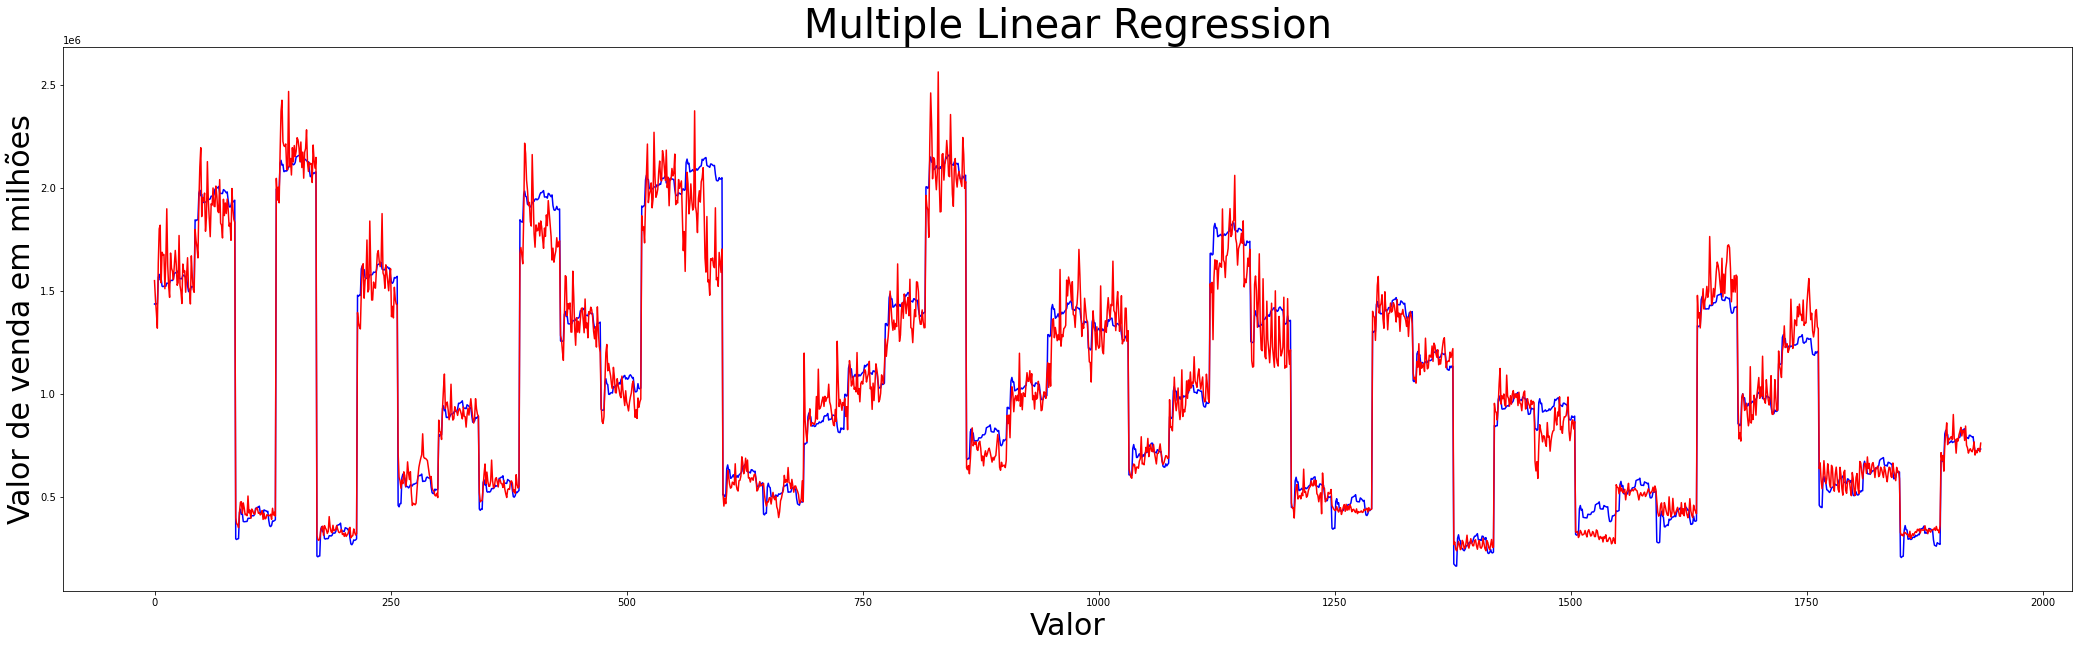

In [14]:
plt.figure(figsize = (36, 10)) 
plt.plot(predictions, 'b')
plt.plot(test_Y, 'r')
plt.title("Multiple Linear Regression", fontsize=40)
plt.xlabel("Valor", fontsize=30)
plt.ylabel("Valor de venda em milhões", fontsize=30)

plt.show()

In [25]:
dt = DecisionTreeRegressor()
dt.fit(train_X, train_Y)
predictions = dt.predict(test_X)

In [26]:
r2_score(test_Y, predictions), mean_absolute_error(test_Y, predictions), np.sqrt(mean_squared_error(test_Y, predictions))

(0.5576419178826659, 219118.62363307495, 356836.0011278781)

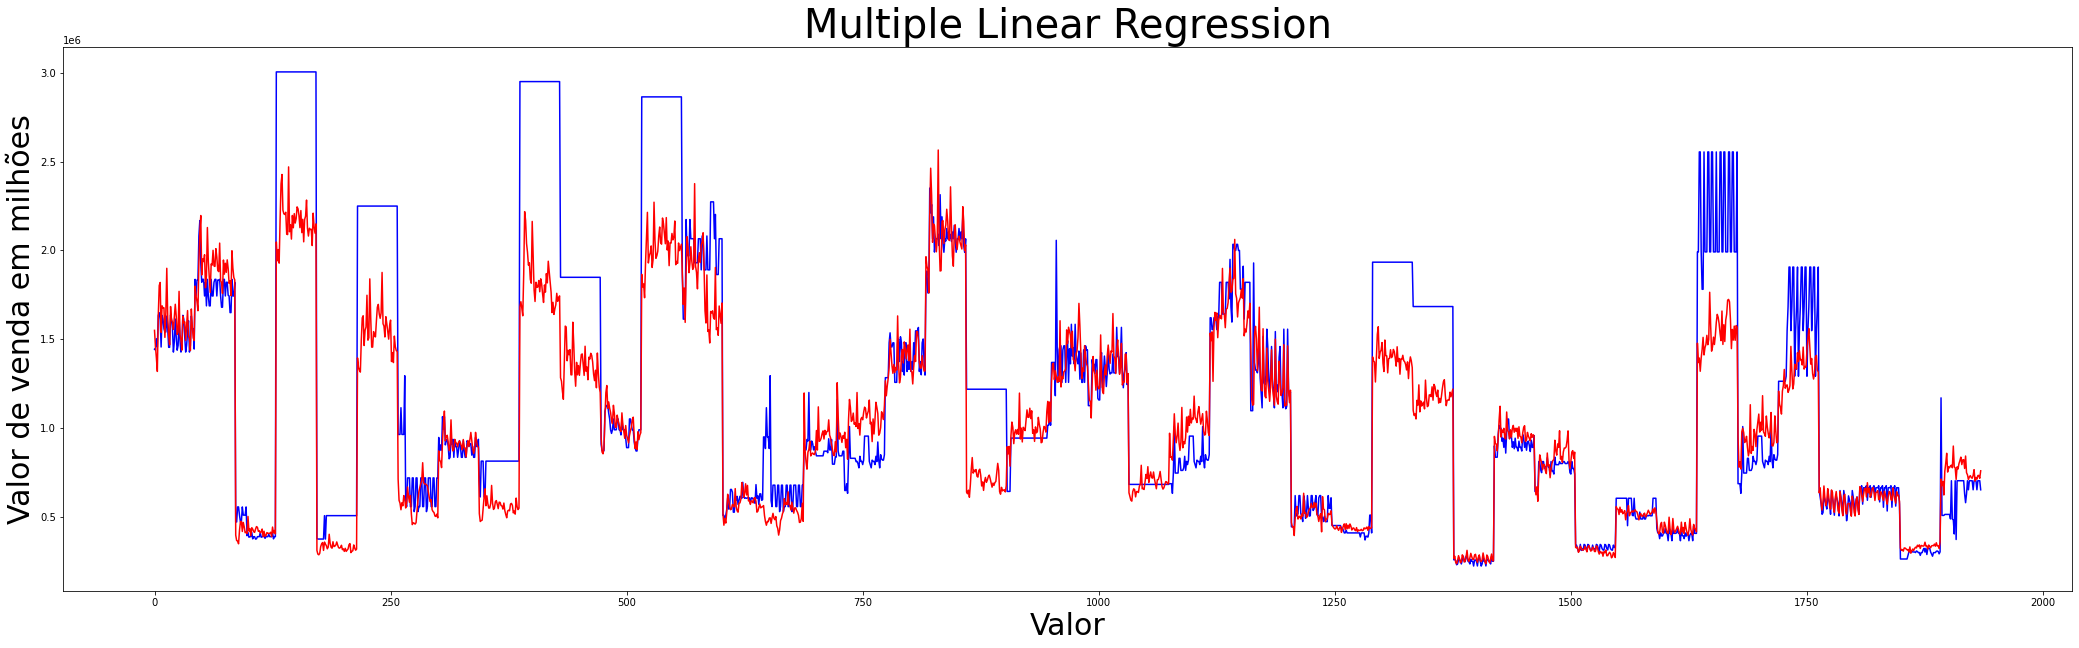

In [28]:
plt.figure(figsize = (36, 10)) 
plt.plot(predictions, 'b')
plt.plot(test_Y, 'r')
plt.title("Multiple Linear Regression", fontsize=40)
plt.xlabel("Valor", fontsize=30)
plt.ylabel("Valor de venda em milhões", fontsize=30)

plt.show()